# Лабораторная работа

## Описание задания

Лабораторная работа выполняется Вами в течение семестра. Для удобства
задание разбито на несколько логических частей, соответствующих
изучаемым в рамках курса темам. Не стоит откладывать выполнение этого
задания на самый конец курса.

Каждая из частей лабораторной работы подразумевает проведение
исследования, экспериментов или подведение выводов по ним на основе
датасета:
https://drive.google.com/file/d/1fABzTyH2tlMYjJyDOAnwkH0HkWAG27_L/view?usp=sharing

### Легенда

Вы - успешный специалист в области datascience и вас наняла риэлторская
компания, размещающая объявления о продаже/аренде домов на популярном
сайте для объявлений *vatio.org*. Вам требуется обучить модель, которая
сможет предсказать популярность объявления - исходя из этих предсказаний
аналитики риэлторской компании будут редактировать описания объявлений,
выставляемых на этой платформе.

## Из чего состоит задание?

Всего в лабораторной работе 5 частей:

-   ***EDA*** - необходимо исследовать данные в предлагаемом Вам
    датасете. К исследованию данных относится анализ распределения
    значений в признаках, проверка скоррелированности признаков и т.д.
-   ***Feature engineering*** - необходимо заполнить пропуски в данных,
    обработать категориальные признаки и т.д.
-   ***Выбор целевой метрики*** - необходимо выбрать метрику качества,
    которую вы будете оптимизировать. Для выбранной метрики необходимо
    написать пояснение. В этом задании нет единственного правильного
    ответа, однако за откровенно неадекватный выбор или слабую
    аргументацию будут снижаться баллы.
-   ***Проведение экспериментов*** - необходимо попробовать разные
    модели, изученные в рамках курса и оптимизировать ими выбранную вами
    целевую метрику. Решение, состоящее **только** из grid-search по
    гиперпараметрам Catboost, получает 0 баллов.
-   ***Анализ ошибок модели*** - необходимо взять несколько примеров из
    тестовой части датасета, на которых модель дала неправильный ответ,
    и попытаться проанализировать их, найти закономерности, полученные
    выводы проверить на других примерах.

## Требования к заданиям

### Сдача задания

Лабораторная работа должна быть оформлена в виде Jupyter-ноутбука.
Допускается сдача ноутбука в виде ссылки на Google Colab, но в этом
случае проверьте наличие доступа. В случае, если ноутбук по ссылке
недоступен или удален, работа получает 0 баллов. **Вместе с
Jupyter-ноутбуком приложите pdf-файл, полученный из ноутбука.**
(https://stackoverflow.com/questions/15998491/how-to-convert-ipython-notebooks-to-pdf-and-html)

### Оформление задания

Выводы по каждому блоку должны быть оформлены при помощи Markdown-ячеек
либо содержать понятные (интерпретируемые) графики. Оси на графиках
должны быть подписаны либо ячейка, предшествующая графику, должна
содержать пояснение. Решения, содержащие графики без подписей/пояснений,
output’ы ячеек с кодом более чем на 50% экрана и прочие непотребства,
**не будут** оценены на максимальный балл. Также перед сдачей необходимо
**очистить** output’ы ячеек с *логами обучения*, также очистить выходные
данные ячеек, выполняющих *чтение/загрузку файлов* и подобное.

### Использование иного контента

Мемы при оформлении работы использовать можно, но в меру.
Несодержательная работа, состоящая только из мемов, получает 0 баллов.

## Оценка лабораторной работы

Оценка за каждый блок лабораторной работы выставляется независимо.
Каждый блок оценивается от 0 до 5 баллов. Выполнение лабораторной работы
является необходимым (но не достаточным) условием прохождения курса,
т.к. в сущности подводит итог по всему изученному материалу.

In [ ]:
import pandas as pd
import numpy as np
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import warnings
warnings.filterwarnings('ignore')

##EDA

In [ ]:
df = pd.read_csv('./houses_ads_popularity.csv')
df.sample(10)

,Id,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,TARGET
28420,31238,2.0,4,443c557f99ad29652e50658b932b0ba8,2016-06-29 01:20:45,<p class='MsoNormal'>Located in the heart of R...,Palmetto Street,"['No Fee', 'Dogs Allowed', 'Cats Allowed']",40.7032,7228108,-73.9072,79b23a36ddeca6a132f8152ea336d2b5,['https://photos.renthop.com/2/7228108_8ca9e3f...,3800,1820 Palmetto Street,low
14078,111786,1.0,2,3960b4f30aae5eefe56d7f187de36d9d,2016-04-14 04:51:23,VERY PLAIN JANE APT LOCATED IN A FOURT...,15th St,"['Cats Allowed', 'Dogs Allowed']",40.6645,6872616,-73.9877,324631e1aacaa41bc4475f879756bbb6,['https://photos.renthop.com/2/6872616_b7fa886...,2390,270 15th St,medium
9304,14351,1.0,2,2c00ef12d5431b15c541f4571b957252,2016-06-18 13:17:55,This newly gut renovated apartmnet nuzzled on ...,209 west 109 - Apt 1W,"['Cats Allowed', 'Dogs Allowed', 'No Fee']",40.8029,7181068,-73.9649,b7744166a365d5e35093d1ada2593ea3,['https://photos.renthop.com/2/7181068_2762cea...,3350,209 west 109 - Apt 1W,low
24516,34451,1.0,1,9a306e85ff586447716156e8c1f23889,2016-06-01 03:28:46,"Charming 1 bedroom apartment with a marble, de...",Lexington Avenue,"['Fireplace', 'Hardwood Floors', 'Dogs Allowed...",40.7638,7089707,-73.9667,dc9897d1446cd1c6cbfe61181b1abbbd,['https://photos.renthop.com/2/7089707_c9aae35...,2395,797 Lexington Avenue,low
30576,106639,1.0,0,0,2016-04-05 06:24:41,Minimum Term is 6 Months<br /><br />BROKER FEE...,... West 49th Street,"['Roof Deck', 'Doorman', 'Elevator', 'Fitness ...",40.7646,6826484,-73.9938,15eed7452a6298df1c1f9d10856f5319,['https://photos.renthop.com/2/6826484_289f72d...,2775,... West 49th Street,medium
5388,115434,2.0,2,8a72f3ae6783ec3f27981703a29df04a,2016-04-10 02:00:58,StuyTown offers an unbeatable combination of c...,530 East 23rd Street,"['No Fee', 'Elevator', 'Fitness Center', 'Laun...",40.7351,6851200,-73.9755,dc1a8b86471fd028498f61346d35f13f,['https://photos.renthop.com/2/6851200_d6b4da1...,5581,530 East 23rd Street,low
4676,109646,1.0,0,ede88c26cfe88ca240c365d6d46c9b8d,2016-04-29 06:12:13,LOW FEE!! ALL UTILITIES INCLUDED!!!!! 39th flo...,East 90th,"['Dining Room', 'Doorman', 'Elevator', 'Fitnes...",40.7808,6943385,-73.9508,1fb46c4a72bcf764ac35fc23f394760d,['https://photos.renthop.com/2/6943385_007af40...,1990,260 East 90th,medium
30479,44602,1.0,1,a25686ed8a0431ce131165af3075fc27,2016-05-11 02:13:22,Spacious 2BR 2nd floor walk-up in Midwood. New...,E 3rd St,"['Live-in superintendent', 'No pets', 'Pre-War']",40.6171,6992992,-73.9727,8fb2108625b2d044f38941063fecab94,['https://photos.renthop.com/2/6992992_d79f530...,1775,1366 E 3rd St,medium
5815,93330,1.0,1,38d6074584d4a6d34fe97a8af38f341e,2016-04-12 05:45:25,This astonishing apartment offers all the comf...,East 63rd Street,"['Doorman', 'Elevator', 'Fitness Center', 'Lau...",40.7633,6861253,-73.9628,e6472c7237327dd3903b3d6f6a94515a,['https://photos.renthop.com/2/6861253_a504b0d...,3550,245 East 63rd Street,low
24531,20962,1.0,1,0,2016-06-22 01:25:37,1 bedroom in the heart of the West Village. Th...,Barrow Street,"['Pre-War', 'Dogs Allowed', 'Cats Allowed']",40.7321,7196684,-74.0048,5e3a41252043f3b1e139a3b44a21c88c,['https://photos.renthop.com/2/7196684_1d17e6c...,4195,52 Barrow Street,low


In [ ]:
df.shape

(34546, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34546 entries, 0 to 34545
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               34546 non-null  int64  
 1   bathrooms        34546 non-null  float64
 2   bedrooms         34546 non-null  int64  
 3   building_id      34546 non-null  object 
 4   created          34546 non-null  object 
 5   description      33509 non-null  object 
 6   display_address  34458 non-null  object 
 7   features         34546 non-null  object 
 8   latitude         34546 non-null  float64
 9   listing_id       34546 non-null  int64  
 10  longitude        34546 non-null  float64
 11  manager_id       34546 non-null  object 
 12  photos           34546 non-null  object 
 13  price            34546 non-null  int64  
 14  street_address   34542 non-null  object 
 15  TARGET           34546 non-null  object 
dtypes: float64(3), int64(4), object(9)
memory usage: 4.2+ MB


Приведем значение столбца created к числовому виду

In [ ]:
df.created.isna().sum()

0

In [ ]:
df.created = pd.to_datetime(df.created)
df['year'] = df.created.dt.year
df['month'] = df.created.dt.month
df['day'] = df.created.dt.weekday
df.head()

,Id,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,TARGET,year,month,day
0,57094,1.0,3,0,2016-05-19 18:06:27,A FABULOUS 3BR IN MIDTOWN WEST! PERFECT APAR...,HOW AMAZING IS THIS MIDTOWN WEST STEAL!! NO FE...,"['Laundry In Unit', 'No Fee', 'Elevator']",40.7647,7039994,-73.9918,4bdc3d8c1aaa90d997ce2cb77680679b,['https://photos.renthop.com/2/7039994_07be01b...,4495,W 50 & AVE 10,medium,2016,5,3
1,33389,1.0,1,9225efdfb57a50bf3ec17ebab082f94a,2016-06-16 02:01:49,Renovated Kitchen and Bathroom!,55 River Drive South,"['Dogs Allowed', 'Cats Allowed', 'No Fee']",40.7275,7166774,-74.0322,e5808a5e6cc13988fe596704428d38d5,['https://photos.renthop.com/2/7166774_03cf63a...,2570,55 River Drive South,medium,2016,6,3
2,60458,1.0,0,320de7d3cc88e50a7fbbcfde1e825d21,2016-05-04 02:42:50,RARE AND BEST DEAL ON THE MARKET!!!! PERFECT S...,W 77 Street,"['Elevator', 'Hardwood Floors']",40.7798,6962716,-73.9751,d69d4e111612dd12ef864031c1148543,['https://photos.renthop.com/2/6962716_ec7f56f...,1795,22 W 77 Street,low,2016,5,2
3,53048,1.0,2,ce6d18bf3238e668b2bf23f4110b7b67,2016-05-12 05:57:56,Newly renovated flex 2 apartment offers the ne...,John Street,"['Swimming Pool', 'Doorman', 'Elevator', 'Fitn...",40.7081,7002458,-74.0065,e6472c7237327dd3903b3d6f6a94515a,['https://photos.renthop.com/2/7002458_93f4010...,3400,100 John Street,low,2016,5,3
4,592,1.0,3,fee4d465932160318364d9d48d272879,2016-06-16 06:06:15,LOW FEE apartments do not come around like thi...,West 16th Street,"['Laundry in Building', 'Laundry in Unit', 'Di...",40.7416,7170465,-74.0025,6fba9b3a8327c607b8b043716efee684,['https://photos.renthop.com/2/7170465_9c3f173...,5695,321 West 16th Street,low,2016,6,3


In [ ]:
df.year.unique()

array([2016])

Столбец year не несет никакой смысловой нагрузки, ибо все значения в нем равны 2016

In [ ]:
df = df.drop(columns=['year'])
df.head()

,Id,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,TARGET,month,day
0,57094,1.0,3,0,2016-05-19 18:06:27,A FABULOUS 3BR IN MIDTOWN WEST! PERFECT APAR...,HOW AMAZING IS THIS MIDTOWN WEST STEAL!! NO FE...,"['Laundry In Unit', 'No Fee', 'Elevator']",40.7647,7039994,-73.9918,4bdc3d8c1aaa90d997ce2cb77680679b,['https://photos.renthop.com/2/7039994_07be01b...,4495,W 50 & AVE 10,medium,5,3
1,33389,1.0,1,9225efdfb57a50bf3ec17ebab082f94a,2016-06-16 02:01:49,Renovated Kitchen and Bathroom!,55 River Drive South,"['Dogs Allowed', 'Cats Allowed', 'No Fee']",40.7275,7166774,-74.0322,e5808a5e6cc13988fe596704428d38d5,['https://photos.renthop.com/2/7166774_03cf63a...,2570,55 River Drive South,medium,6,3
2,60458,1.0,0,320de7d3cc88e50a7fbbcfde1e825d21,2016-05-04 02:42:50,RARE AND BEST DEAL ON THE MARKET!!!! PERFECT S...,W 77 Street,"['Elevator', 'Hardwood Floors']",40.7798,6962716,-73.9751,d69d4e111612dd12ef864031c1148543,['https://photos.renthop.com/2/6962716_ec7f56f...,1795,22 W 77 Street,low,5,2
3,53048,1.0,2,ce6d18bf3238e668b2bf23f4110b7b67,2016-05-12 05:57:56,Newly renovated flex 2 apartment offers the ne...,John Street,"['Swimming Pool', 'Doorman', 'Elevator', 'Fitn...",40.7081,7002458,-74.0065,e6472c7237327dd3903b3d6f6a94515a,['https://photos.renthop.com/2/7002458_93f4010...,3400,100 John Street,low,5,3
4,592,1.0,3,fee4d465932160318364d9d48d272879,2016-06-16 06:06:15,LOW FEE apartments do not come around like thi...,West 16th Street,"['Laundry in Building', 'Laundry in Unit', 'Di...",40.7416,7170465,-74.0025,6fba9b3a8327c607b8b043716efee684,['https://photos.renthop.com/2/7170465_9c3f173...,5695,321 West 16th Street,low,6,3


Анализ распределения значений в признаках:

In [ ]:
def statistics(col):
  print(f'Тип данных: {df[col].dtype}')
  print(f'Количество уникальных значений: {df[col].unique().size}')
  print(f'Количество NaN: {df[col].isna().sum()}')

In [ ]:
def draw_plot(name, title, xaxis_title, yaxis_title):
  fig = px.histogram(df, x=name, title=title, color_discrete_sequence=['#FCB2CE'])
  fig.update_layout(xaxis_title=xaxis_title, yaxis_title=yaxis_title)
  fig.update_traces(marker_line_width=1, marker_line_color="white")
  fig.show()

1. Bathrooms

In [ ]:
statistics('bathrooms')
draw_plot('bathrooms', 'Распределение ванных комнат', 'Количество комнат', 'Количество объявлений')

Тип данных: float64
Количество уникальных значений: 12
Количество NaN: 0


2. Bedrooms

In [ ]:
statistics('bedrooms')
draw_plot('bedrooms', 'Распределение спальных комнат', 'Количество комнат', 'Количество объявлений')

Тип данных: int64
Количество уникальных значений: 8
Количество NaN: 0


3. Building id

In [ ]:
statistics('building_id')

Тип данных: object
Количество уникальных значений: 6378
Количество NaN: 0


Количество уникальных значений слишком велико, график рисовать не будем

4. Created

In [ ]:
statistics('created')

Тип данных: datetime64[ns]
Количество уникальных значений: 34186
Количество NaN: 0


Аналогично предыдущему пункту

5. Description

In [ ]:
statistics('description')

Тип данных: object
Количество уникальных значений: 27758
Количество NaN: 1037


In [ ]:
df.description = df.description.fillna('')

6. Display address

In [ ]:
statistics('display_address')

Тип данных: object
Количество уникальных значений: 6999
Количество NaN: 88


In [ ]:
df.display_address = df.display_address.fillna('')

7. Features

In [ ]:
statistics('features')

Тип данных: object
Количество уникальных значений: 8245
Количество NaN: 0


In [ ]:
df.features.head()

0            ['Laundry In Unit', 'No Fee', 'Elevator']
1           ['Dogs Allowed', 'Cats Allowed', 'No Fee']
2                      ['Elevator', 'Hardwood Floors']
3    ['Swimming Pool', 'Doorman', 'Elevator', 'Fitn...
4    ['Laundry in Building', 'Laundry in Unit', 'Di...
Name: features, dtype: object

In [ ]:
features = df.features.apply(eval)
features.head()

0                  [Laundry In Unit, No Fee, Elevator]
1                 [Dogs Allowed, Cats Allowed, No Fee]
2                          [Elevator, Hardwood Floors]
3    [Swimming Pool, Doorman, Elevator, Fitness Cen...
4    [Laundry in Building, Laundry in Unit, Dishwas...
Name: features, dtype: object

In [ ]:
features_count = pd.Series([elem.lower() for features_list in features for elem in features_list]).value_counts().sort_values(ascending=False)
features_count

elevator                                                                                     18517
hardwood floors                                                                              16539
cats allowed                                                                                 16466
dogs allowed                                                                                 15423
doorman                                                                                      14746
                                                                                             ...  
convertible-2                                                                                    1
78th & lexington ave                                                                             1
loft area                                                                                        1
open kitchen                                                                                     1
garage fit

Супер, теперь разобьем фичи на компоненты и будем присваивать каждому объекту 1, если он имеет данную фичу, 0 - в противном случае

In [ ]:
def generate(x):
    keys = [i.lower().strip(" '[]") for i in x.split(',') if x != '[]']
    dict_return = {}
    for key in keys:
        dict_return[key] = 1
    return dict_return

In [ ]:
features = df.features.apply(lambda x: generate(x)).apply(pd.Series)
features = features.fillna(0)
features

,laundry in unit,no fee,elevator,dogs allowed,cats allowed,hardwood floors,swimming pool,doorman,fitness center,dishwasher,...,polished hardwood floors,sparkling marble bathroom,mins from train,no fee hardwood floors,brand new ss appliances,700 sf,new,total reno. heart of west village,** elegant east village! * massive 2br super share * modern & new * exposed brick * lndry bldg **,garage fitness facility laundry room valet lounge billiards room rooftop deck wifi access
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34541,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34542,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34544,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
features.shape

(34546, 1052)

In [ ]:
df.shape

(34546, 18)

In [ ]:
columns = list(features)
df[columns] = features[columns]
df.head(5)

,Id,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,...,polished hardwood floors,sparkling marble bathroom,mins from train,no fee hardwood floors,brand new ss appliances,700 sf,new,total reno. heart of west village,** elegant east village! * massive 2br super share * modern & new * exposed brick * lndry bldg **,garage fitness facility laundry room valet lounge billiards room rooftop deck wifi access
0,57094,1.0,3,0,2016-05-19 18:06:27,A FABULOUS 3BR IN MIDTOWN WEST! PERFECT APAR...,HOW AMAZING IS THIS MIDTOWN WEST STEAL!! NO FE...,"['Laundry In Unit', 'No Fee', 'Elevator']",40.7647,7039994,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,33389,1.0,1,9225efdfb57a50bf3ec17ebab082f94a,2016-06-16 02:01:49,Renovated Kitchen and Bathroom!,55 River Drive South,"['Dogs Allowed', 'Cats Allowed', 'No Fee']",40.7275,7166774,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,60458,1.0,0,320de7d3cc88e50a7fbbcfde1e825d21,2016-05-04 02:42:50,RARE AND BEST DEAL ON THE MARKET!!!! PERFECT S...,W 77 Street,"['Elevator', 'Hardwood Floors']",40.7798,6962716,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,53048,1.0,2,ce6d18bf3238e668b2bf23f4110b7b67,2016-05-12 05:57:56,Newly renovated flex 2 apartment offers the ne...,John Street,"['Swimming Pool', 'Doorman', 'Elevator', 'Fitn...",40.7081,7002458,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,592,1.0,3,fee4d465932160318364d9d48d272879,2016-06-16 06:06:15,LOW FEE apartments do not come around like thi...,West 16th Street,"['Laundry in Building', 'Laundry in Unit', 'Di...",40.7416,7170465,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


8. Latitude, longitude

In [ ]:
statistics('latitude')
statistics('longitude')

Тип данных: float64
Количество уникальных значений: 2182
Количество NaN: 0
Тип данных: float64
Количество уникальных значений: 1566
Количество NaN: 0


In [ ]:
fig = make_subplots()
fig = px.scatter(x=df.latitude, y=df.longitude, color=df.TARGET, title='Распределение объектов по координатам', labels={'x':'Широта', 'y':'Долгота'})
fig.show()

Видим, что большинство объявлений сосредоточено рядом:

In [ ]:
df = df.drop(df[(df['latitude'] == 0) & (df['longitude'] == 0)].index)

fig = make_subplots()
fig = px.scatter(x=df.latitude, y=df.longitude, color=df.TARGET, title='Распределение объектов по координатам', labels={'x':'Широта', 'y':'Долгота'})
fig.show()

Уже симпатичнее. Большинство координат указывают на окресности Нью-Йорка

9. Listing id

In [ ]:
statistics('listing_id')

Тип данных: int64
Количество уникальных значений: 34538
Количество NaN: 0


10. Manager id

In [ ]:
statistics('manager_id')

Тип данных: object
Количество уникальных значений: 3132
Количество NaN: 0


11. Photos

In [ ]:
df.photos = df.photos.str.count(',') + 1

In [ ]:
statistics('photos')
draw_plot('photos', 'Распределение количества фотографий', 'Количество фотографий', 'Count')

Тип данных: int64
Количество уникальных значений: 41
Количество NaN: 0


12. Price

In [ ]:
statistics('price')
df.price.min(), df.price.mean(), df.price.max()

Тип данных: int64
Количество уникальных значений: 2407
Количество NaN: 0


(45, 3888.4455961549597, 4490000)

Как видно, медианная цена слишком далека от максимальной. Поэтому для визуализации следует рассматривать более узкий диапазон значений

In [ ]:
fig = px.histogram(x=df.price[df.price <= 20000], title='Распределение стоимости', histfunc='count', color_discrete_sequence=['#FCB2CE'])
fig.update_layout(xaxis_title='Стоимость', yaxis_title='Количество объявлений')
fig.update_traces(marker_line_width=1, marker_line_color="white")
fig.show()

13. Street address

In [ ]:
statistics('street_address')

Тип данных: object
Количество уникальных значений: 12391
Количество NaN: 4


In [ ]:
df.street_address = df.street_address.fillna('')

14. Target

In [ ]:
statistics('TARGET')
draw_plot('TARGET', 'Распределение таргета', 'Популярность', 'Количество объявлений')

Тип данных: object
Количество уникальных значений: 3
Количество NaN: 0


15. Month, day

In [ ]:
statistics('month')
draw_plot('month', 'Распределение месяцев', 'Месяц', 'Количество объявлений')

statistics('day')
draw_plot('day', 'Распределение дней', 'День', 'Количество объявлений')

Тип данных: int64
Количество уникальных значений: 3
Количество NaN: 0


Тип данных: int64
Количество уникальных значений: 7
Количество NaN: 0


Проверка скоррелированности признаков:

In [ ]:
df.corr(method='pearson')

,Id,bathrooms,bedrooms,latitude,listing_id,longitude,photos,price,month,day,...,polished hardwood floors,sparkling marble bathroom,mins from train,no fee hardwood floors,brand new ss appliances,700 sf,new,total reno. heart of west village,** elegant east village! * massive 2br super share * modern & new * exposed brick * lndry bldg **,garage fitness facility laundry room valet lounge billiards room rooftop deck wifi access
Id,1.000000,-0.000112,-0.013235,-0.011408,-0.852567,-0.006082,-0.016481,-0.006845,-0.942466,0.023506,...,-0.007289,-0.007289,-0.007289,0.004965,0.004965,-0.002124,0.004335,0.004335,0.003675,-0.003057
bathrooms,-0.000112,1.000000,0.534704,0.017963,-0.001033,-0.003138,0.147488,0.056009,-0.001204,-0.016496,...,-0.002291,-0.002291,-0.002291,-0.002291,-0.002291,-0.002291,-0.002291,-0.002291,-0.002291,0.008566
bedrooms,-0.013235,0.534704,1.000000,0.002668,0.008524,0.027305,0.155066,0.043646,0.011512,-0.016923,...,0.002214,0.002214,0.002214,0.007033,0.007033,-0.002606,0.002214,0.002214,0.002214,0.002214
latitude,-0.011408,0.017963,0.002668,1.000000,0.015796,0.479055,-0.046323,-0.001761,0.014369,0.004535,...,-0.000539,-0.000539,-0.000539,-0.012898,-0.012898,0.000246,-0.002079,-0.002079,-0.003071,-0.000456
listing_id,-0.852567,-0.001033,0.008524,0.015796,1.000000,0.006481,0.011745,0.009517,0.905118,-0.024427,...,0.002942,0.002942,0.002942,-0.008740,-0.008740,-0.000770,-0.006903,-0.006903,-0.004593,0.003911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700 sf,-0.002124,-0.002291,-0.002606,0.000246,-0.000770,-0.000199,-0.001043,-0.000202,-0.000130,0.003255,...,-0.000029,-0.000029,-0.000029,-0.000029,-0.000029,1.000000,-0.000029,-0.000029,-0.000029,-0.000029
new,0.004335,-0.002291,0.002214,-0.002079,-0.006903,-0.003129,-0.001043,-0.000059,-0.006665,-0.005768,...,-0.000029,-0.000029,-0.000029,-0.000029,-0.000029,-0.000029,1.000000,1.000000,-0.000029,-0.000029
total reno. heart of west village,0.004335,-0.002291,0.002214,-0.002079,-0.006903,-0.003129,-0.001043,-0.000059,-0.006665,-0.005768,...,-0.000029,-0.000029,-0.000029,-0.000029,-0.000029,-0.000029,1.000000,1.000000,-0.000029,-0.000029
** elegant east village! * massive 2br super share * modern & new * exposed brick * lndry bldg **,0.003675,-0.002291,0.002214,-0.003071,-0.004593,-0.000958,-0.001043,-0.000141,-0.006665,0.006263,...,-0.000029,-0.000029,-0.000029,-0.000029,-0.000029,-0.000029,-0.000029,-0.000029,1.000000,-0.000029


##Feature engineering

Удалим лишние признаки

In [ ]:
df = df.drop(columns=['Id', 'created', 'description', 
                               'display_address', 'features', 
                               'listing_id', 'manager_id',
                               'building_id',
                               'street_address']) 
df.shape

(34538, 1061)

Проверим наличие пропусков

In [ ]:
df.isna().any()[df.isna().any()]  

Series([], dtype: bool)

Займемся нормализацией

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
cols = ['bathrooms', 'bedrooms', 'latitude',
        'longitude', 'price', 'day',
        'photos', 'month']

scaler = StandardScaler()
scaler.fit(df[cols])
scaled = scaler.transform(df[cols])

df[cols] = scaled
df.head()

,bathrooms,bedrooms,latitude,longitude,photos,price,TARGET,month,day,laundry in unit,...,polished hardwood floors,sparkling marble bathroom,mins from train,no fee hardwood floors,brand new ss appliances,700 sf,new,total reno. heart of west village,** elegant east village! * massive 2br super share * modern & new * exposed brick * lndry bldg **,garage fitness facility laundry room valet lounge billiards room rooftop deck wifi access
0,-0.425792,1.307030,0.257038,-0.354780,-0.764152,0.023055,medium,-0.024156,0.045963,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.425792,-0.484256,-0.457345,-1.076225,2.087003,-0.050114,medium,1.190243,0.045963,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.425792,-1.379899,0.547015,-0.056559,0.091194,-0.079571,low,-0.024156,-0.513002,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.425792,0.411387,-0.829899,-0.617286,-0.479037,-0.018566,low,-0.024156,0.045963,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.425792,1.307030,-0.186571,-0.545856,-0.764152,0.068666,low,1.190243,0.045963,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##Выбор целевой метрики

Нам нужно решить задачу классификации

На выбор следующие метрики: accuracy, Precision, Recall, f1-score.

Остановимся на f1-score, так как она представляет собой совместную оценку точности и полноты

In [ ]:
from sklearn.metrics import f1_score, classification_report

##Проведение экспериментов

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(columns=['TARGET'])
y = df['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def results(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    labels = ["low", "medium", "high"]

    print(classification_report(y_test, y_pred, labels=labels))

Рассмотрим три модели:

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [ ]:
estimators = [LinearSVC(), LogisticRegression(), DecisionTreeClassifier()]
for estimator in estimators:
  print(f'model: {estimator}')
  results(estimator, X_train, X_test, y_train, y_test)

model: LinearSVC()
              precision    recall  f1-score   support

         low       0.72      0.97      0.83      4804
      medium       0.41      0.12      0.18      1563
        high       0.36      0.02      0.03       541

    accuracy                           0.70      6908
   macro avg       0.50      0.37      0.35      6908
weighted avg       0.62      0.70      0.62      6908

model: LogisticRegression()
              precision    recall  f1-score   support

         low       0.73      0.95      0.83      4804
      medium       0.40      0.15      0.22      1563
        high       0.50      0.03      0.05       541

    accuracy                           0.70      6908
   macro avg       0.54      0.38      0.37      6908
weighted avg       0.64      0.70      0.63      6908

model: DecisionTreeClassifier()
              precision    recall  f1-score   support

         low       0.80      0.80      0.80      4804
      medium       0.38      0.37      0.38      1

Итак, лучше всего себя показало дерево. Пройдемся по его гиперпараметрам:

In [ ]:
def plot_fitting_curve(param, param_range, X_train, X_test, y_train, y_test):
    train = list()
    test = list()
    for p in param_range:
        model = DecisionTreeClassifier(**{param: p})
        model.fit(X_train, y_train)
        y_pred_train, y_pred_test = model.predict(X_train), model.predict(X_test)
        f1_medium_train = classification_report(y_train, y_pred_train).split()
        f1_medium_train = float(f1_medium_train[f1_medium_train.index('medium') + 3])
        f1_medium_test = classification_report(y_test, y_pred_test).split()
        f1_medium_test = float(f1_medium_test[f1_medium_test.index('medium') + 3])

        train.append(f1_medium_train)
        test.append(f1_medium_test)

    fig = go.Figure(go.Scatter(x=param_range, y=train, name='train'))
    fig.add_trace(go.Scatter(x=param_range, y=test, name='test'))
    fig.update_layout(title_text=f'Параметр {param}')
    fig.update_xaxes(title_text=f'{param}')
    fig.update_yaxes(title_text='f1')
    fig.show()

In [ ]:
params = ['max_depth', 'min_samples_split', 'min_samples_leaf']
ranges = [np.arange(1, 20), np.arange(2, 100, 5), np.arange(1, 20, 2)]
for param, param_range in zip(params, ranges):
  plot_fitting_curve(param, param_range, X_train, X_test, y_train, y_test)

А теперь посмотрим, как будет работать модель на лучших параметрах:

In [ ]:
results(DecisionTreeClassifier(max_depth=13, min_samples_split = 40, min_samples_leaf = 10), X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

         low       0.79      0.89      0.84      4804
      medium       0.43      0.33      0.37      1563
        high       0.45      0.24      0.31       541

    accuracy                           0.71      6908
   macro avg       0.56      0.49      0.51      6908
weighted avg       0.68      0.71      0.69      6908



Нам удалось немного улучшить результат

Теперь перейдем к ансамблям

In [ ]:
#!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 9.1 MB/s eta 0:00:00


In [ ]:
from sklearn.ensemble import StackingClassifier, BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from catboost import CatBoostClassifier

In [ ]:
tree = DecisionTreeClassifier(max_depth=13, min_samples_split = 40, min_samples_leaf = 10)

1. StackingClassifier

In [ ]:
estimators = [('svr', LinearSVC(random_state=42)), ('log reg', LogisticRegression(random_state=42)), ('tree', tree)]
stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=tree)
results(stacking_classifier, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

         low       0.78      0.89      0.83      4804
      medium       0.40      0.27      0.33      1563
        high       0.40      0.26      0.31       541

    accuracy                           0.70      6908
   macro avg       0.53      0.47      0.49      6908
weighted avg       0.66      0.70      0.68      6908



2. BaggingClassifier

In [ ]:
models = [LogisticRegression(), DecisionTreeClassifier(random_state=42), tree, LinearSVC(random_state=42)]
for model in models:
    bagging_classifier = BaggingClassifier(model, n_estimators=10, random_state=42)
    print(f'model: {model}')
    results(bagging_classifier, X_train, X_test, y_train, y_test)

model: LogisticRegression()
              precision    recall  f1-score   support

         low       0.73      0.95      0.83      4804
      medium       0.40      0.15      0.22      1563
        high       0.42      0.02      0.05       541

    accuracy                           0.70      6908
   macro avg       0.52      0.38      0.36      6908
weighted avg       0.63      0.70      0.63      6908

model: DecisionTreeClassifier(random_state=42)
              precision    recall  f1-score   support

         low       0.79      0.89      0.84      4804
      medium       0.45      0.32      0.37      1563
        high       0.44      0.31      0.37       541

    accuracy                           0.72      6908
   macro avg       0.56      0.51      0.53      6908
weighted avg       0.69      0.72      0.70      6908

model: DecisionTreeClassifier(max_depth=13, min_samples_leaf=10, min_samples_split=40)
              precision    recall  f1-score   support

         low       0.

Лучше всего bagging сработал на деревьях. Посмотрим на гиперпараметры

In [ ]:
param_range = np.arange(5, 50, 5)
train = list()
test = list()

for p in param_range:
    model = BaggingClassifier(DecisionTreeClassifier(max_depth=13, min_samples_split = 40, min_samples_leaf = 10), n_estimators=p)
    model.fit(X_train, y_train)
    y_pred_train, y_pred_test = model.predict(X_train), model.predict(X_test)
    f1_medium_train = classification_report(y_train, y_pred_train).split()
    f1_medium_train = float(f1_medium_train[f1_medium_train.index('medium') + 3])
    f1_medium_test = classification_report(y_test, y_pred_test).split()
    f1_medium_test = float(f1_medium_test[f1_medium_test.index('medium') + 3])
    train.append(f1_medium_train)
    test.append(f1_medium_test)

fig = go.Figure(go.Scatter(x=param_range, y=train, name='train'))
fig.add_trace(go.Scatter(x=param_range, y=test, name='test'))
fig.update_layout(title_text=f'Параметр n_estimators')
fig.update_xaxes(title_text='n_estimators')
fig.update_yaxes(title_text='f1')
fig.show()

In [ ]:
results(BaggingClassifier
        (DecisionTreeClassifier(max_depth=13, min_samples_split = 40, min_samples_leaf = 10), n_estimators=15) , X_train, X_test, y_train, y_test
        )

              precision    recall  f1-score   support

         low       0.78      0.93      0.85      4804
      medium       0.48      0.29      0.36      1563
        high       0.56      0.21      0.30       541

    accuracy                           0.73      6908
   macro avg       0.61      0.48      0.50      6908
weighted avg       0.69      0.73      0.70      6908



Качество практически не изменилось

3. RandomForestClassifier

In [ ]:
forest = RandomForestClassifier(random_state=42)
results(forest, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

         low       0.76      0.94      0.84      4804
      medium       0.43      0.20      0.27      1563
        high       0.51      0.21      0.29       541

    accuracy                           0.72      6908
   macro avg       0.57      0.45      0.47      6908
weighted avg       0.67      0.72      0.67      6908



Гиперпараметры:

In [ ]:
def plot_fitting_curve_forest(param: str, values: list, X_train, X_test, y_train, y_test):
    train = []
    test = []
    for value in values:
        model = RandomForestClassifier(random_state=42, **{param: value})
        model.fit(X_train, y_train)
        
        y_pred_train, y_pred_test = model.predict(X_train), model.predict(X_test)
        f1_high_train = classification_report(y_train, y_pred_train).split()
        f1_high_train = float(f1_high_train[f1_high_train.index('high') + 3])
        f1_high_test = classification_report(y_test, y_pred_test).split()
        f1_high_test = float(f1_high_test[f1_high_test.index('high') + 3])
        
        train.append(f1_high_train)
        test.append(f1_high_test)
    
    fig = go.Figure(go.Scatter(x=param_range, y=train, name='train'))
    fig.add_trace(go.Scatter(x=param_range, y=test, name='test'))
    fig.update_layout(title_text=f'Параметр {param}')
    fig.update_xaxes(title_text=f'{param}')
    fig.update_yaxes(title_text='f1')
    fig.show()

In [ ]:
params = ['max_depth', 'min_samples_split', 'n_estimators']
ranges = [np.arange(5, 50, 5), np.arange(10, 100, 10), np.arange(5, 50, 5)]

for param, param_range in zip(params, ranges):
  plot_fitting_curve_forest(param, param_range, X_train, X_test, y_train, y_test)

In [ ]:
forest = RandomForestClassifier(max_depth=15, min_samples_split=10, n_estimators=15, random_state=42)
results(forest, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

         low       0.70      1.00      0.82      4804
      medium       0.52      0.01      0.01      1563
        high       1.00      0.00      0.01       541

    accuracy                           0.70      6908
   macro avg       0.74      0.34      0.28      6908
weighted avg       0.68      0.70      0.58      6908



4. GradientBoostingClassifier

In [ ]:
gradient_boosting_classifier = GradientBoostingClassifier(random_state=42)
results(gradient_boosting_classifier, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

         low       0.76      0.96      0.85      4804
      medium       0.47      0.20      0.28      1563
        high       0.65      0.18      0.28       541

    accuracy                           0.73      6908
   macro avg       0.63      0.45      0.47      6908
weighted avg       0.68      0.73      0.68      6908



Гиперпараметры:

In [ ]:
def plot_fitting_curve_boost(parameter: str, values: list, X_train, X_test, y_train, y_test):
    train = []
    test = []
    for value in values:
        model = GradientBoostingClassifier(**{parameter: value}, random_state=42)
        model.fit(X_train, y_train)  
        y_pred_train, y_pred_test = model.predict(X_train), model.predict(X_test)
        
        f1_high_train = classification_report(y_train, y_pred_train).split()
        f1_high_train = float(f1_high_train[f1_high_train.index('high') + 3])
        f1_high_test = classification_report(y_test, y_pred_test).split()
        f1_high_test = float(f1_high_test[f1_high_test.index('high') + 3])
        
        train.append(f1_high_train)
        test.append(f1_high_test)
    fig = go.Figure(go.Scatter(x=param_range, y=train, name='train'))
    fig.add_trace(go.Scatter(x=param_range, y=test, name='test'))
    fig.update_layout(title_text=f'Параметр {param}')
    fig.update_xaxes(title_text=f'{param}')
    fig.update_yaxes(title_text='f1')
    fig.show()

In [ ]:
params = ['learning_rate', 'n_estimators']
ranges = [np.linspace(0.05, 0.5, 10), np.arange(5, 50, 5)]

for param, param_range in zip(params, ranges):
  plot_fitting_curve_boost(param, param_range, X_train, X_test, y_train, y_test)

Долго, однако

In [ ]:
gradient_boosting_classifier = GradientBoostingClassifier(learning_rate=0.7, n_estimators=45, random_state=42)
results(gradient_boosting_classifier, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

         low       0.79      0.93      0.85      4804
      medium       0.47      0.31      0.37      1563
        high       0.59      0.23      0.33       541

    accuracy                           0.73      6908
   macro avg       0.61      0.49      0.52      6908
weighted avg       0.70      0.73      0.70      6908



5. CatBoostClassifier

In [ ]:
cat_boost_classifier = CatBoostClassifier(verbose=False)
cat_boost_classifier.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, labels=["low", "medium", "high"]))

              precision    recall  f1-score   support

         low       0.78      0.93      0.85      4804
      medium       0.48      0.29      0.36      1563
        high       0.57      0.22      0.31       541

    accuracy                           0.73      6908
   macro avg       0.61      0.48      0.51      6908
weighted avg       0.70      0.73      0.70      6908



Лучше всего себя показал GradientBoostingClassifier

##Анализ ошибок модели

In [ ]:
best_model = GradientBoostingClassifier(learning_rate=0.7, n_estimators=45, random_state=42)
best_model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.7, n_estimators=45, random_state=42)

In [ ]:
y_pred = best_model.predict(X_test)
errors = X_test.copy()
errors['target'] = y_test
errors['preds'] = y_pred
errors = errors[errors.target != errors.preds]

errors.head()

,bathrooms,bedrooms,latitude,longitude,photos,price,month,day,laundry in unit,no fee,...,mins from train,no fee hardwood floors,brand new ss appliances,700 sf,new,total reno. heart of west village,** elegant east village! * massive 2br super share * modern & new * exposed brick * lndry bldg **,garage fitness facility laundry room valet lounge billiards room rooftop deck wifi access,target,preds
25903,1.591908,2.202674,-0.046383,-0.081560,0.661425,0.087671,1.190243,0.045963,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,medium,low
29946,-0.425792,0.411387,1.315168,0.252376,0.091194,-0.054675,-1.238555,-1.071966,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,low,medium
9840,-0.425792,-0.484256,-1.749762,-0.235135,-0.764152,-0.052774,-1.238555,-0.513002,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,medium,low
24620,1.591908,1.307030,0.032353,-0.427996,0.661425,0.027046,-1.238555,0.604927,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,medium,low
24704,-0.425792,1.307030,0.798585,0.380950,-0.193921,-0.053724,-0.024156,-1.071966,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,low,medium


Рассмотрим распределения некоторых признаков

In [ ]:
import seaborn as sns

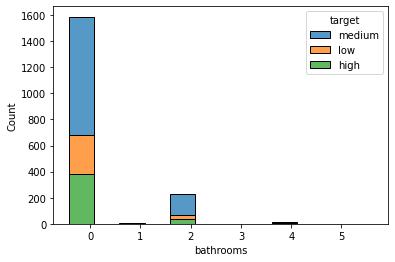

In [ ]:
sns.histplot(errors, x='bathrooms', hue='target', multiple='stack')

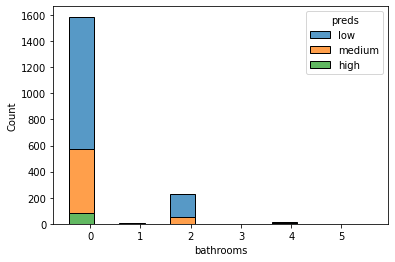

In [ ]:
sns.histplot(errors, x='bathrooms', hue='preds', multiple='stack')

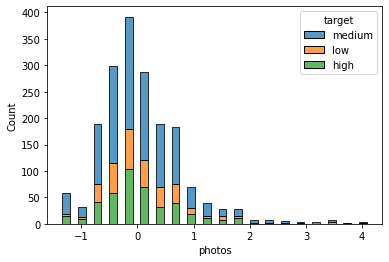

In [ ]:
sns.histplot(errors, x='photos', hue='target', multiple='stack')

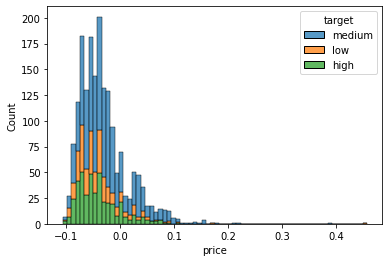

In [ ]:
sns.histplot(errors, x='price', hue='target', multiple='stack')

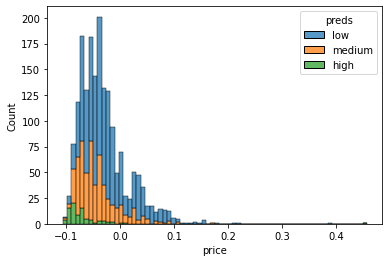

In [ ]:
sns.histplot(errors, x='price', hue='preds', multiple='stack')

Так как в изначальной выборке преобладает таргет 'low', все модели в большей степени учатся искать этот класс, поэтому в граничных случаях они делают выбор в пользу low. Возможно, следует добавить еще какие-либо признаки, чтобы лучше обозначить границы для модели